In [1]:
import os

os.environ["KERAS_BACKEND"] = "jax"

import numpy as np
import pandas as pd

from keras import models
from keras import layers
from keras import losses
from keras import metrics

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from utils import CustomEvalDataset

plt.style.use("seaborn-v0_8-notebook")
plt.style.use("petroff10")

In [2]:
to_numpy_array = lambda img: np.array(img, dtype=np.float32) / 255.0

mnist_data_train = torchvision.datasets.MNIST(
    "./data",
    train=True,
    download=True,
    transform=to_numpy_array,
)
mnist_data_test = torchvision.datasets.MNIST(
    "./data",
    train=False,
    download=True,
    transform=to_numpy_array,
)
x_example, y_example = mnist_data_train[0]

In [3]:
print(type(x_example), x_example.shape)

<class 'numpy.ndarray'> (28, 28)


In [4]:
x_example.max()

np.float32(1.0)

In [5]:
B = 32
mnist_train_loader = DataLoader(mnist_data_train, batch_size=B, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test, batch_size=B)

In [6]:
# How many values are in the input? We use this to help determine the size of subsequent layers
D = 28 * 28  # 28 * 28 images
# How many channels are in the input?
C = 1
# How many classes are there?
classes = 10
# How many filters should we use
filters = 16
# how large should our filters be?
K = 3

In [7]:
x_shape = x_example.shape

In [8]:
model_linear = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Flatten(),
        layers.Dense(256, activation="tanh"),
        layers.Dense(classes, activation="softmax"),
    ]
)

fc_callback_predict_test = CustomEvalDataset(datasets=mnist_test_loader)
model_linear.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
model_linear.fit(
    mnist_train_loader, callbacks=[fc_callback_predict_test], epochs=20, verbose=2
)

Epoch 1/20
1875/1875 - 3s - 2ms/step - loss: 0.5914 - sparse_categorical_accuracy: 0.8491
Epoch 2/20
1875/1875 - 2s - 1ms/step - loss: 0.3511 - sparse_categorical_accuracy: 0.9012
Epoch 3/20
1875/1875 - 2s - 1ms/step - loss: 0.3129 - sparse_categorical_accuracy: 0.9108
Epoch 4/20
1875/1875 - 2s - 1ms/step - loss: 0.2910 - sparse_categorical_accuracy: 0.9179
Epoch 5/20
1875/1875 - 2s - 1ms/step - loss: 0.2744 - sparse_categorical_accuracy: 0.9218
Epoch 6/20
1875/1875 - 2s - 1ms/step - loss: 0.2604 - sparse_categorical_accuracy: 0.9262
Epoch 7/20
1875/1875 - 2s - 1ms/step - loss: 0.2476 - sparse_categorical_accuracy: 0.9303
Epoch 8/20
1875/1875 - 2s - 1ms/step - loss: 0.2358 - sparse_categorical_accuracy: 0.9332
Epoch 9/20
1875/1875 - 2s - 1ms/step - loss: 0.2245 - sparse_categorical_accuracy: 0.9370
Epoch 10/20
1875/1875 - 2s - 1ms/step - loss: 0.2140 - sparse_categorical_accuracy: 0.9403
Epoch 11/20
1875/1875 - 2s - 1ms/step - loss: 0.2043 - sparse_categorical_accuracy: 0.9429
Epoch 12

In [9]:
(1, *x_shape)

(1, 28, 28)

In [10]:
model_cnn = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Reshape((1, *x_shape)),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Flatten(),
        layers.Dense(classes, activation="softmax"),
    ]
)

model_cnn.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_callback_predict_test = CustomEvalDataset(datasets=mnist_test_loader)
model_cnn.fit(
    mnist_train_loader, callbacks=[cnn_callback_predict_test], epochs=20, verbose=2
)

Epoch 1/20
1875/1875 - 6s - 3ms/step - loss: 0.4289 - sparse_categorical_accuracy: 0.8828
Epoch 2/20
1875/1875 - 5s - 2ms/step - loss: 0.2967 - sparse_categorical_accuracy: 0.9140
Epoch 3/20
1875/1875 - 4s - 2ms/step - loss: 0.2763 - sparse_categorical_accuracy: 0.9204
Epoch 4/20
1875/1875 - 4s - 2ms/step - loss: 0.2612 - sparse_categorical_accuracy: 0.9246
Epoch 5/20
1875/1875 - 4s - 2ms/step - loss: 0.2473 - sparse_categorical_accuracy: 0.9301
Epoch 6/20
1875/1875 - 4s - 2ms/step - loss: 0.2338 - sparse_categorical_accuracy: 0.9330
Epoch 7/20
1875/1875 - 4s - 2ms/step - loss: 0.2215 - sparse_categorical_accuracy: 0.9371
Epoch 8/20
1875/1875 - 4s - 2ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9407
Epoch 9/20
1875/1875 - 4s - 2ms/step - loss: 0.1954 - sparse_categorical_accuracy: 0.9456
Epoch 10/20
1875/1875 - 5s - 2ms/step - loss: 0.1809 - sparse_categorical_accuracy: 0.9495
Epoch 11/20
1875/1875 - 6s - 3ms/step - loss: 0.1666 - sparse_categorical_accuracy: 0.9539
Epoch 12

<Axes: xlabel='epochs', ylabel='Accuracy'>

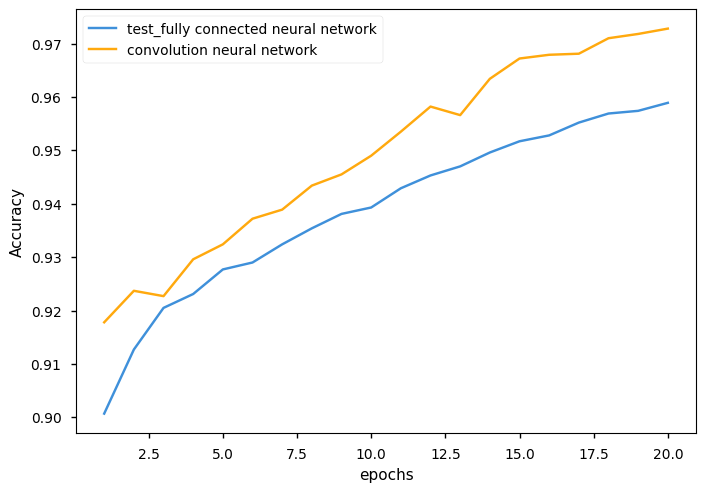

In [11]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 21, 1),
        "test_fully connected neural network": fc_callback_predict_test.list_metrics,
        "convolution neural network": cnn_callback_predict_test.list_metrics,
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [12]:
mnist_data_train[0][0].shape

(28, 28)

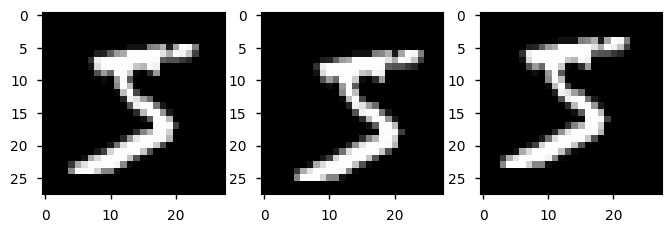

In [13]:
img_indx = 0
img, correct_class = mnist_data_train[img_indx]

# move to the lower right, then upper left
img_lr = np.roll(np.roll(img, 1, axis=1), 1, axis=0)
img_ul = np.roll(np.roll(img, -1, axis=1), -1, axis=0)
# plot the images
f, axarr = plt.subplots(1, 3)
axarr[0].imshow(img, cmap="gray")
axarr[1].imshow(img_lr, cmap="gray")
axarr[2].imshow(img_ul, cmap="gray")
plt.show()

In [14]:
img_pred = model_cnn.predict(img.reshape(1, 28, 28), verbose=0).ravel()
img_lr_pred = model_cnn.predict(img_lr.reshape(1, 28, 28), verbose=0).ravel()
img_ul_pred = model_cnn.predict(img_ul.reshape(1, 28, 28), verbose=0).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

Org Img Class 5 Prob:          0.90055096
Lower Right Img Class 5 Prob:  0.6680352
Uper Left Img Class 5 Prob:    0.9414382


In [15]:
model_cnn_pool = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Reshape((1, *x_shape)),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(classes, activation="softmax"),
    ]
)

model_cnn_pool.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)

cnn_pool_callback_predict_test = CustomEvalDataset(datasets=mnist_test_loader)
model_cnn_pool.fit(
    mnist_train_loader, callbacks=[cnn_pool_callback_predict_test], epochs=20, verbose=2
)

Epoch 1/20
1875/1875 - 35s - 18ms/step - loss: 0.3930 - sparse_categorical_accuracy: 0.8885
Epoch 2/20
1875/1875 - 33s - 18ms/step - loss: 0.1293 - sparse_categorical_accuracy: 0.9628
Epoch 3/20
1875/1875 - 34s - 18ms/step - loss: 0.0970 - sparse_categorical_accuracy: 0.9720
Epoch 4/20
1875/1875 - 37s - 20ms/step - loss: 0.0818 - sparse_categorical_accuracy: 0.9765
Epoch 5/20
1875/1875 - 33s - 18ms/step - loss: 0.0722 - sparse_categorical_accuracy: 0.9789
Epoch 6/20
1875/1875 - 35s - 19ms/step - loss: 0.0653 - sparse_categorical_accuracy: 0.9810
Epoch 7/20
1875/1875 - 33s - 18ms/step - loss: 0.0603 - sparse_categorical_accuracy: 0.9826
Epoch 8/20
1875/1875 - 34s - 18ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9833
Epoch 9/20
1875/1875 - 32s - 17ms/step - loss: 0.0527 - sparse_categorical_accuracy: 0.9844
Epoch 10/20
1875/1875 - 35s - 19ms/step - loss: 0.0494 - sparse_categorical_accuracy: 0.9853
Epoch 11/20
1875/1875 - 33s - 18ms/step - loss: 0.0471 - sparse_categorical_acc

In [16]:
img_pred = model_cnn_pool.predict(img.reshape(1, 28, 28), verbose=0).ravel()
img_lr_pred = model_cnn_pool.predict(img_lr.reshape(1, 28, 28), verbose=0).ravel()
img_ul_pred = model_cnn_pool.predict(img_ul.reshape(1, 28, 28), verbose=0).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

Org Img Class 5 Prob:          0.74255264
Lower Right Img Class 5 Prob:  0.47280926
Uper Left Img Class 5 Prob:    0.96664095


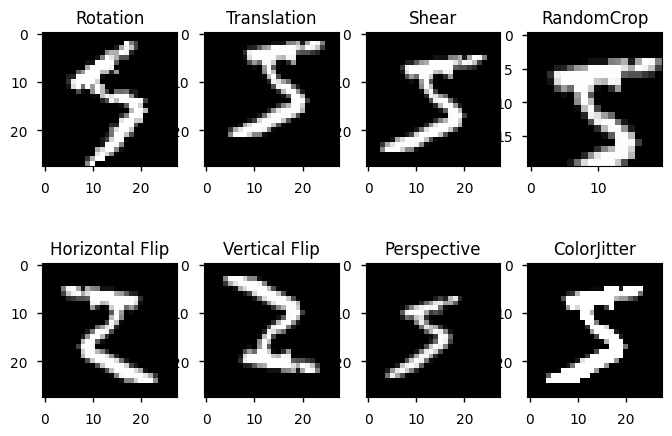

In [17]:
# Several built-in transformations, given some agressive values to make their impact more obvious.
sample_transforms = {
    "Rotation": transforms.RandomAffine(degrees=45),
    "Translation": transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    "Shear": transforms.RandomAffine(degrees=0, shear=45),
    "RandomCrop": transforms.RandomCrop((20, 20)),
    "Horizontal Flip": transforms.RandomHorizontalFlip(p=1.0),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    "Perspective": transforms.RandomPerspective(p=1.0),
    "ColorJitter": transforms.ColorJitter(brightness=0.9, contrast=0.9),
}
# Convert the Tensor image back to a PIL image using a transform
pil_img = transforms.ToPILImage()(img)
# Plot a randomy application of each transform
_, axarr = plt.subplots(2, 4)
for count, (name, t) in enumerate(sample_transforms.items()):
    row = count % 4
    col = count // 4
    axarr[col, row].imshow(t(pil_img), cmap="gray")
    axarr[col, row].set_title(name)
plt.show()

In [18]:
train_transform = transforms.Compose(
    [
        transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.98, 1.02)),
        to_numpy_array,
    ]
)

test_transform = to_numpy_array

mnist_train_t = torchvision.datasets.MNIST(
    "./data", train=True, transform=train_transform
)
mnist_test_t = torchvision.datasets.MNIST(
    "./data", train=False, transform=test_transform
)
mnist_train_loader_t = DataLoader(mnist_train_t, shuffle=True, batch_size=B)
mnist_test_loader_t = DataLoader(mnist_test_t, batch_size=B)

In [19]:
model_cnn_pool = models.Sequential(
    [
        layers.Input(shape=x_shape),
        layers.Reshape((1, *x_shape)),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.Conv2D(
            filters=filters,
            kernel_size=K,
            padding="same",
            data_format="channels_first",
            activation="tanh",
        ),
        layers.MaxPool2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(classes, activation="softmax"),
    ]
)

model_cnn_pool.compile(
    optimizer="SGD",
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()],
)
cnn_pool_with_argu_callback_predict_test = CustomEvalDataset(datasets=mnist_test_loader)
model_cnn_pool.fit(
    mnist_train_loader_t,
    callbacks=[cnn_pool_with_argu_callback_predict_test],
    epochs=20,
    verbose=2,
)

Epoch 1/20
1875/1875 - 37s - 19ms/step - loss: 0.5366 - sparse_categorical_accuracy: 0.8434
Epoch 2/20
1875/1875 - 37s - 20ms/step - loss: 0.1714 - sparse_categorical_accuracy: 0.9494
Epoch 3/20
1875/1875 - 36s - 19ms/step - loss: 0.1239 - sparse_categorical_accuracy: 0.9630
Epoch 4/20
1875/1875 - 35s - 19ms/step - loss: 0.1045 - sparse_categorical_accuracy: 0.9692
Epoch 5/20
1875/1875 - 34s - 18ms/step - loss: 0.0924 - sparse_categorical_accuracy: 0.9719
Epoch 6/20
1875/1875 - 35s - 19ms/step - loss: 0.0841 - sparse_categorical_accuracy: 0.9746
Epoch 7/20
1875/1875 - 35s - 19ms/step - loss: 0.0761 - sparse_categorical_accuracy: 0.9767
Epoch 8/20
1875/1875 - 36s - 19ms/step - loss: 0.0705 - sparse_categorical_accuracy: 0.9788
Epoch 9/20
1875/1875 - 35s - 19ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0.9796
Epoch 10/20
1875/1875 - 34s - 18ms/step - loss: 0.0615 - sparse_categorical_accuracy: 0.9814
Epoch 11/20
1875/1875 - 35s - 18ms/step - loss: 0.0616 - sparse_categorical_acc

<Axes: xlabel='epochs', ylabel='Accuracy'>

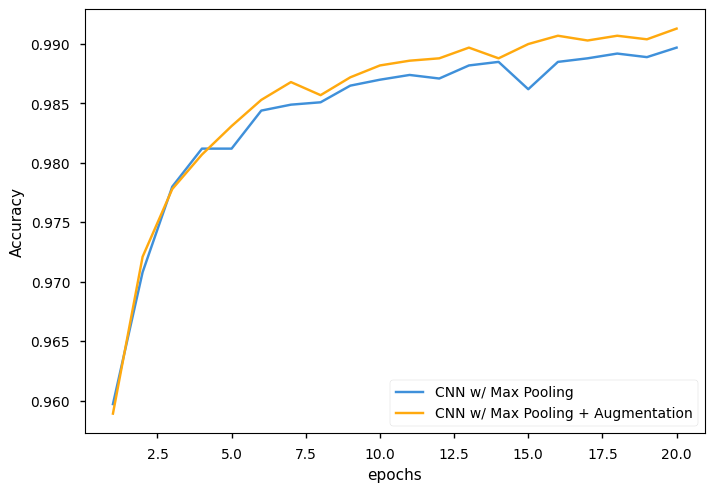

In [20]:
pd.DataFrame(
    {
        "epochs": np.arange(1, 21, 1),
        "CNN w/ Max Pooling": cnn_pool_callback_predict_test.list_metrics,
        "CNN w/ Max Pooling + Augmentation": cnn_pool_with_argu_callback_predict_test.list_metrics,
    }
).set_index("epochs").plot(ylabel="Accuracy")

In [21]:
img_pred = model_cnn_pool.predict(img.reshape(1, 28, 28), verbose=0).ravel()
img_lr_pred = model_cnn_pool.predict(img_lr.reshape(1, 28, 28), verbose=0).ravel()
img_ul_pred = model_cnn_pool.predict(img_ul.reshape(1, 28, 28), verbose=0).ravel()

print("Org Img Class {} Prob:         ".format(correct_class), img_pred[correct_class])
print(
    "Lower Right Img Class {} Prob: ".format(correct_class), img_lr_pred[correct_class]
)
print(
    "Uper Left Img Class {} Prob:   ".format(correct_class), img_ul_pred[correct_class]
)

Org Img Class 5 Prob:          0.85202146
Lower Right Img Class 5 Prob:  0.61125666
Uper Left Img Class 5 Prob:    0.9564586
